In [51]:
from tinygrad import Tensor
from train import TransducerLoss, iterate, load_data, RNNT, forward
from data import text_encode
import matplotlib.pyplot as plt

In [2]:
def imshow(x):
    if isinstance(x,Tensor): x = x.numpy()
    while len(x.shape) > 2: x = x[:,:,0]
    plt.imshow(x[:,:])
    plt.show()

In [3]:
BS = 2
SLEN = 5

In [4]:
def stack(tensors):
    R = tensors[0].unsqueeze(0)
    for t in tensors[1:]:
        R = R.cat(t.unsqueeze(0), axis=0)

In [23]:
elb = lambda x:x[60:100,:40]

In [5]:
def extract():
    ci,maxX, maxY = load_data(SLEN)
    train_set = ci[:-BS*2]
    X, labels, X_lens, label_lens = next(iterate(train_set, BS, maxX, maxY))
    L = forward(X,labels, X_lens, label_lens, maxX, maxY)
    ctx = L._ctx
    L.backward()

    A = ctx.a[0].unsqueeze(1)
    for a in ctx.a[1:]:
        A = A.cat(a.unsqueeze(1), dim=1).realize()
    B = ctx.b[0].unsqueeze(1)
    for b in ctx.b[1:]:
        B = B.cat(b.unsqueeze(1), dim=1).realize()
    
    return L,ctx, A, B

L, ctx,A,B = extract()

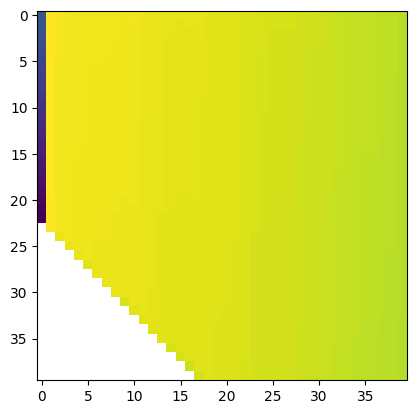

In [25]:
a = A[0]
a = (a)
imshow(elb(a))

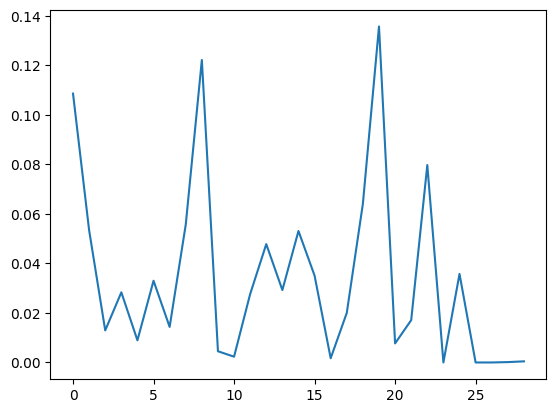

In [68]:
plt.plot(ctx.lattice[0,0,0].numpy())

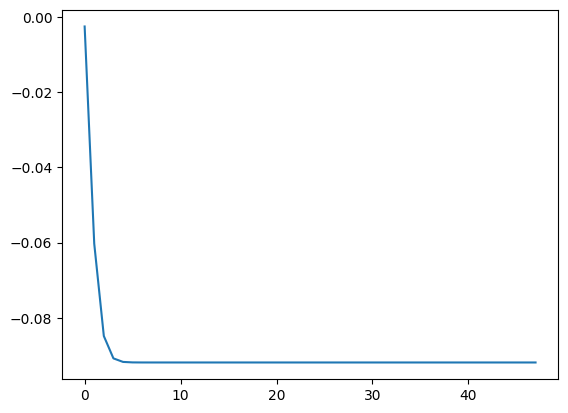

In [122]:
plt.plot(ctx.skip[1][1:49,1].numpy())

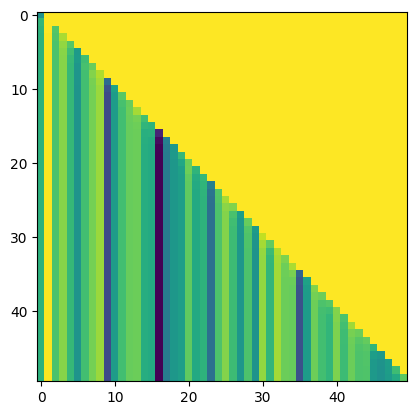

In [40]:
imshow(ctx.skip[0][:50,:50])

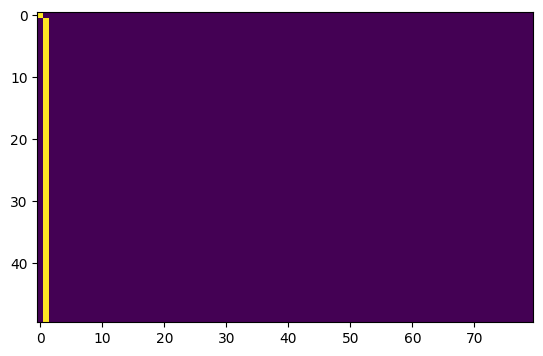

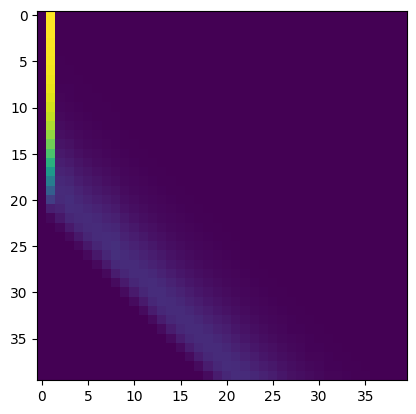

In [97]:
i=0
ab = A[i] + B[i]
ab = (ab-ab.max()).exp()
imshow(ab[:50,:80])
imshow(elb(ab))